# **BASIC BINARY CLASSIFICATION MODEL WITH SIMPLE NEURAL NETWORK**

IT IS FULLY CONNECTED NEURAL NETWORK I AM NOT USING CNN HERE

# Create , train and save a simple neural netwrok

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader , Dataset
from torchvision.datasets import ImageFolder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np


In [4]:
torch.manual_seed(10)

lets try a basic binary classification model for two typs of


In [5]:
# Defining a simple neural network architecture
class modelNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(modelNN, self).__init__()
    self.fc1 = nn.Linear(3 * 256 * 256 , 128)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(128, 64)
    self.relu = nn.ReLU()
    self.fc3 = nn.Linear(64, 32)
    self.relu = nn.ReLU()
    self.fc4 = nn.Linear(32, 2)
    self.softmax = nn.Softmax(dim=1)

  def forward(self, x):
    x = x.view(-1,3*256*256)
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    x = self.relu(x)
    x = self.fc3(x)
    x = self.relu(x)
    x = self.fc4(x)
    x = self.softmax(x)
    return x


In [6]:
# setting up data transfornm
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [7]:
#define clas for dataset
class CustomDataset(Dataset):
  def __init__(self, root, transform=None):
    self.dataset = ImageFolder(root, transform=transform)

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    #image, label = self.dataset[idx]
    return self.dataset[idx]

In [8]:
#DATA LOADERS
train_dataset= CustomDataset(root='/content/drive/MyDrive/Car_Classification/train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, num_workers=8, shuffle=True)

test_dataset = CustomDataset(root='/content/drive/MyDrive/Car_Classification/test', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, num_workers=8, shuffle=False)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [9]:
model = modelNN(input_size=3*256*256, hidden_size=128, output_size=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5)  # Reduce LR if validation loss plateaus


In [10]:
for name, param in model.named_parameters():
    if 'weight' in name:
        print(f"Layer: {name}, Weight Shape: {param.shape}, Weight Values:\n {param.data}\n")
        # Access the weight values: param.data
    elif 'bias' in name:
        print(f"Layer: {name}, Bias Shape: {param.shape}, Bias Values:\n {param.data}\n")
        # Access the bias values: param.data

Layer: fc1.weight, Weight Shape: torch.Size([128, 196608]), Weight Values:
 tensor([[-1.8906e-04, -7.7326e-05, -8.4574e-04,  ..., -2.0701e-03,
         -4.2385e-04, -2.7034e-04],
        [ 2.0040e-03,  2.5180e-04, -1.5096e-03,  ...,  4.1500e-04,
          9.6482e-04, -1.5813e-03],
        [-1.4448e-03, -2.6457e-04, -1.4462e-04,  ...,  1.7498e-04,
         -1.3295e-03,  1.7719e-03],
        ...,
        [ 3.4997e-04, -3.0144e-04, -5.1299e-04,  ...,  1.8477e-04,
         -1.2476e-03,  4.4823e-04],
        [ 2.0800e-03,  1.5789e-03, -2.2551e-03,  ..., -2.2477e-03,
         -2.1587e-03, -1.7000e-03],
        [-2.7455e-04,  2.0644e-03,  3.9773e-04,  ..., -5.7787e-04,
          1.4072e-03,  1.8312e-03]])

Layer: fc1.bias, Bias Shape: torch.Size([128]), Bias Values:
 tensor([ 6.6251e-04, -1.9871e-03, -6.7548e-05, -4.9345e-04, -9.9455e-04,
         1.0047e-03,  6.3896e-04, -1.8644e-03, -1.8027e-04,  1.3844e-03,
         1.1769e-03,  2.1064e-03, -1.1034e-04, -2.5999e-04,  1.5285e-03,
         1

In [11]:
!nvidia-smi

Wed Dec 18 22:48:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [12]:
torch.cuda.is_available()

True

TRAINING LOOP

In [13]:
num_epochs= 50
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
train_loss=[]
valid_loss=[]
#train_accuracy=[]



for epoch in range(num_epochs):
  #model training
  model.train()
  running_loss = 0.0
  print(f'Epoch [{epoch+1}/{num_epochs}]')
  for images, labels in train_loader:
    images = images.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()


  average_train_loss= running_loss / len(train_loader)
  print(average_train_loss,'average_loss')
  train_loss.append(average_train_loss)  # will append the loss in outer loop means it is appending at each epochs

  #validation
  model.eval()
  Evalid_loss = 0.0
  with torch.no_grad():
    for images, labels in test_loader:
      images = images.to(device)
      labels = labels.to(device)

      outputs = model(images)
      loss = criterion(outputs, labels)
      Evalid_loss += loss.item()

    average_valid_loss = Evalid_loss / len(test_loader)
    valid_loss.append(average_valid_loss)

    scheduler.step(average_valid_loss)

  print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {average_train_loss:.4f}, Valid Loss: {average_valid_loss:.4f}')


Epoch [1/50]
0.7394609619986336 average_loss
Epoch [1/50], Train Loss: 0.7395, Valid Loss: 0.7039
Epoch [2/50]
0.7402781248092651 average_loss
Epoch [2/50], Train Loss: 0.7403, Valid Loss: 0.7039
Epoch [3/50]
0.738570047999328 average_loss
Epoch [3/50], Train Loss: 0.7386, Valid Loss: 0.7039
Epoch [4/50]
0.7394277779561169 average_loss
Epoch [4/50], Train Loss: 0.7394, Valid Loss: 0.7039
Epoch [5/50]
0.7412621637560287 average_loss
Epoch [5/50], Train Loss: 0.7413, Valid Loss: 0.7039
Epoch [6/50]
0.7405742631768281 average_loss
Epoch [6/50], Train Loss: 0.7406, Valid Loss: 0.7039
Epoch [7/50]
0.7412621502606374 average_loss
Epoch [7/50], Train Loss: 0.7413, Valid Loss: 0.7039
Epoch [8/50]
0.7401156605414625 average_loss
Epoch [8/50], Train Loss: 0.7401, Valid Loss: 0.7039
Epoch [9/50]
0.7398863670960912 average_loss
Epoch [9/50], Train Loss: 0.7399, Valid Loss: 0.7039
Epoch [10/50]
0.7410328613137299 average_loss
Epoch [10/50], Train Loss: 0.7410, Valid Loss: 0.7039
Epoch [11/50]
0.740

In [14]:
#nvidia-smi

MODEL EVALUATION


In [15]:

#evaluation of model
def evaluate_model(model, dataloader):
  model.eval()
  all_preds = []
  all_labels = []

  with torch.no_grad():
    for images, labels in dataloader:
      images = images.to(device)
      labels = labels.to(device)
      outputs = model(images)
      _, preds = torch.max(outputs, 1)
      all_preds.extend(preds.cpu().numpy())
      all_labels.extend(labels.cpu().numpy())

  accuracy = accuracy_score(all_labels, all_preds)
  precision = precision_score(all_labels, all_preds, average='weighted')
  recall = recall_score(all_labels, all_preds, average='weighted')
  f1 = f1_score(all_labels, all_preds, average='weighted')

  print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')
  return accuracy, precision, recall, f1


evaluate_model(model, test_loader)

Accuracy: 0.5000, Precision: 0.2500, Recall: 0.5000, F1 Score: 0.3333


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.5, 0.25, 0.5, 0.33333333333333326)

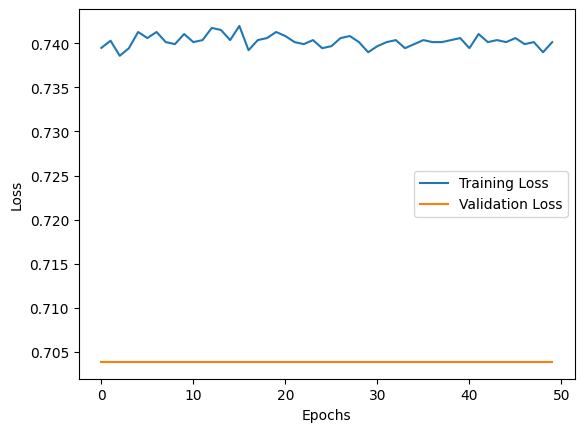

In [16]:
#visualising
plt.plot(train_loss, label='Training Loss')
plt.plot(valid_loss, label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
'''accuracy, precision, recall, f1 = evaluate_model(model, test_loader)
plt.plot(accuracy, label='Training Accuracy')
#plt.plot(valid_accruacy, label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()'''

"accuracy, precision, recall, f1 = evaluate_model(model, test_loader)\nplt.plot(accuracy, label='Training Accuracy')\n#plt.plot(valid_accruacy, label='Validation Accuracy')\n\nplt.xlabel('Epochs')\nplt.ylabel('Accuracy')\nplt.legend()\nplt.show()"

In [18]:
#save the model
torch.save(model.state_dict(), 'binary_classification_model.pth')

In [19]:
#load the model
model = modelNN(input_size=3*256*256, hidden_size=128, output_size=2)
model.load_state_dict(torch.load('binary_classification_model.pth'))
model.eval()

<ipython-input-19-05f0fc905950>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('binary_classification_model.pth'))


modelNN(
  (fc1): Linear(in_features=196608, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=2, bias=True)
  (softmax): Softmax(dim=1)
)

In [20]:
#lets load a unique unseen image for testing
from PIL import Image
image_path='/content/drive/MyDrive/Car_Classification/image.jpeg'
image = Image.open(image_path)

input_tensor = transform(image).unsqueeze(0)
print(input_tensor.shape)

torch.Size([1, 3, 256, 256])


In [21]:
#make prediction on the testing image
with torch.no_grad():
  model_output = model(input_tensor)

_, predicted_class = torch.max(model_output, 1)
print(predicted_class)

tensor([1])


In [22]:
class_labels=['SUV','Sedan']
predicted_class_labels=class_labels[predicted_class.item()]
print("the model predicts that image belongs to ",predicted_class_labels, " class")

the model predicts that image belongs to  Sedan  class


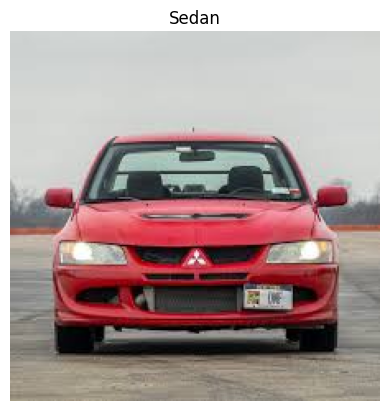

In [23]:
#import numpy as np
# convert image image to numpy array
image_arr=np.array(image)
plt.imshow(image_arr)
plt.title(predicted_class_labels)
plt.axis('off')
plt.show()

In [24]:
!nvidia-smi

Wed Dec 18 23:29:21 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0              30W /  70W |    783MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--